# Problem statement (Term Deposit Sale)

We have data from a Portuguese bank on details of customers related to selling a term deposit. The objective of the project is to help the marketing team identify potential customers who are relatively more likely to subscribe to the term deposit and this increase the hit ratio.



# Attribute Information


1 - age  
2 - job : type of job  
3 - marital : marital status  
4 - education  
5 - default: has credit in default?  
6 - housing: has housing loan?  
7 - loan: has personal loan?  
8 - balance in account  
9 - contact: contact communication type  
10 - month: last contact month of year  
11 - day: last contact day of the month  
12 - duration: last contact duration, in seconds  
13 - campaign: number of contacts performed during this campaign and for this client  
14 - pdays: number of days that passed by after the client was last contacted from a previous campaign  
15 - previous: number of contacts performed before this campaign and for this client  
16 - poutcome: outcome of the previous marketing campaign    
17 - Output variable ('Target'): has the client subscribed a term deposit?



# Exploratory data analysis

In [574]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix 

from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [575]:
bankdf = pd.read_csv('bank-full.csv')

In [576]:
bankdf.shape

(45211, 17)

In [577]:
bankdf.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [578]:
bankdf.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [579]:
bankdf.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

###  Univariate analysis : Data types and description of the independent attributes which should include (name,  range of values observed, central values (mean and median), standard deviation and quartiles, skewness).

#### Features and Data types

In [580]:
bankdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Name, range of values observed, central values (mean and median), standard deviation and quartiles, skewness

In [585]:
def describe(df):
    ddf=pd.concat([df.describe().T,
                      df.mad().rename('mad'),
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt'),
                     ], axis=1).T
    ddf.loc["range"] = ddf.loc["max"] - ddf.loc["min"]
    return ddf
pd.set_option('display.float_format', lambda x: '%.2f' % x)
describe(bankdf).transpose()

,count,mean,std,min,25%,50%,75%,max,mad,skew,kurt,range
age,45211.00,40.94,10.62,18.00,33.00,39.00,48.00,95.00,8.74,0.68,0.32,77.00
balance,45211.00,1362.27,3044.77,-8019.00,72.00,448.00,1428.00,102127.00,1551.51,8.36,140.75,110146.00
day,45211.00,15.81,8.32,1.00,8.00,16.00,21.00,31.00,7.06,0.09,-1.06,30.00
duration,45211.00,258.16,257.53,0.00,103.00,180.00,319.00,4918.00,170.97,3.14,18.15,4918.00
campaign,45211.00,2.76,3.10,1.00,1.00,2.00,3.00,63.00,1.79,4.90,39.25,62.00
pdays,45211.00,40.20,100.13,-1.00,-1.00,-1.00,-1.00,871.00,67.61,2.62,6.94,872.00
previous,45211.00,0.58,2.30,0.00,0.00,0.00,0.00,275.00,0.95,41.85,4506.86,275.00


### Univariate analysis : Make a function to plot ‘countplot’ if the variable is categorical and ‘distplot’ if the variable is numeric. - 3 Marks

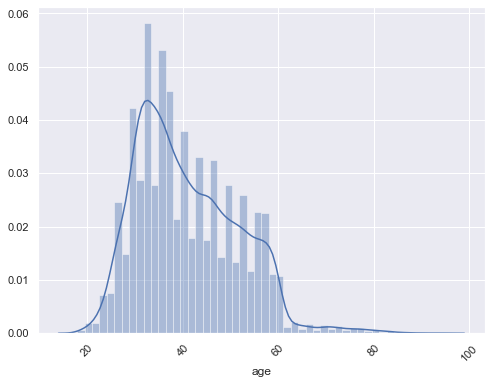

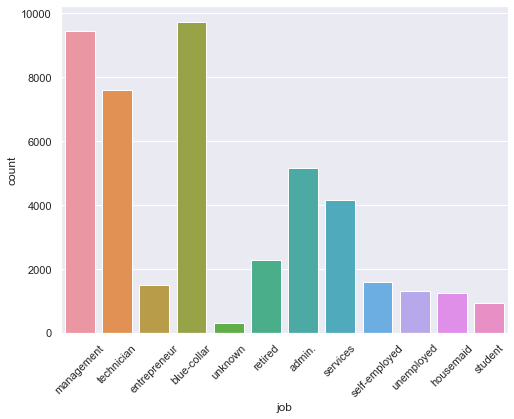

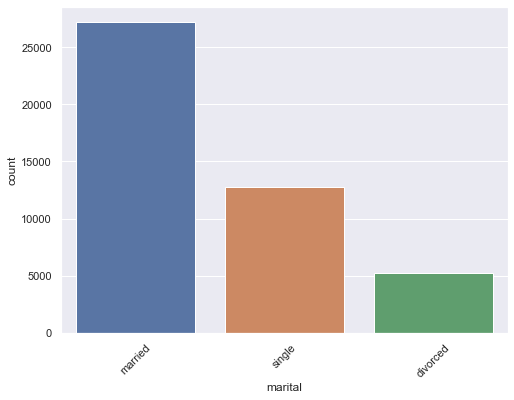

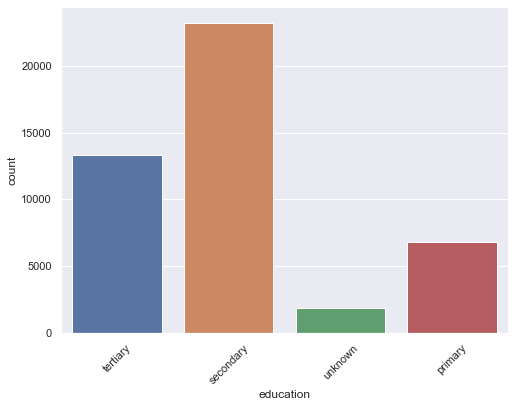

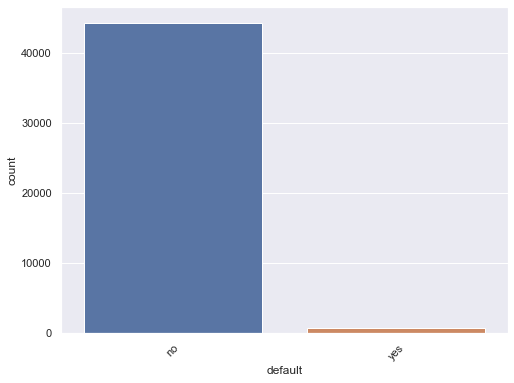

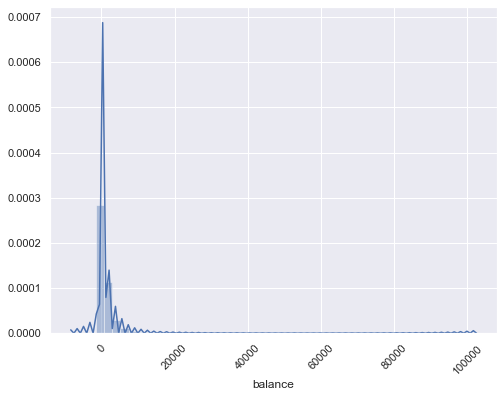

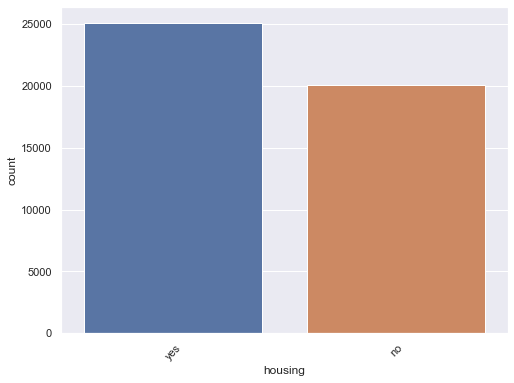

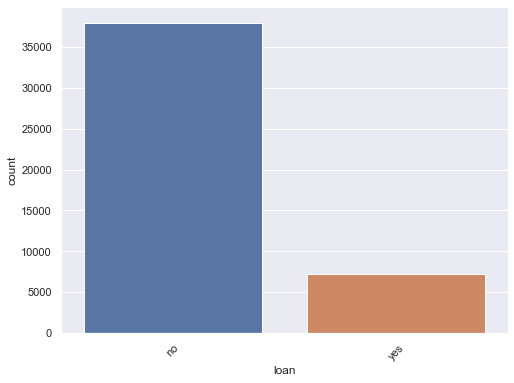

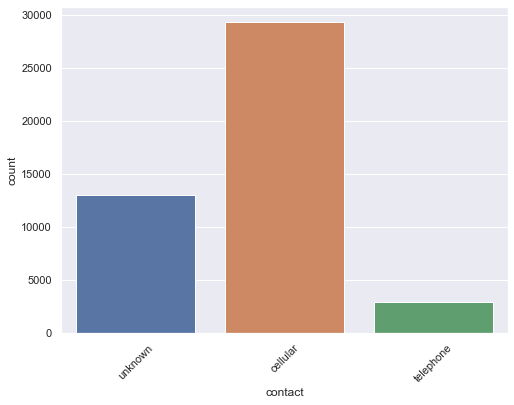

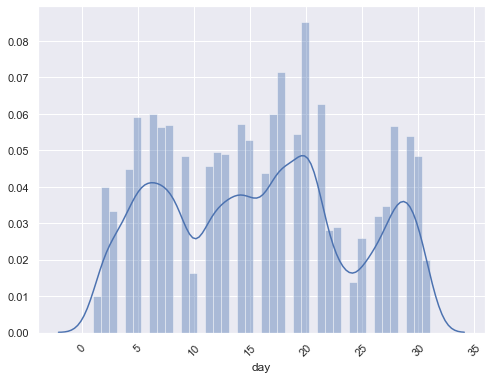

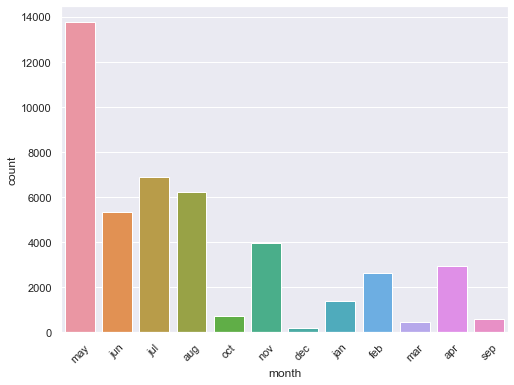

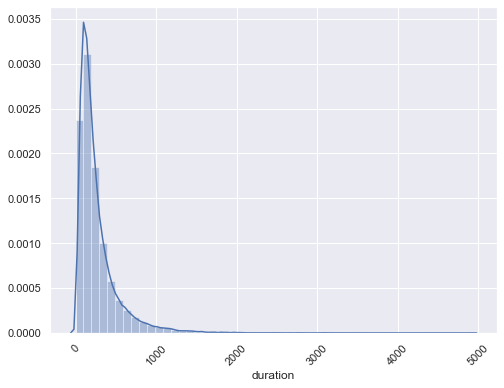

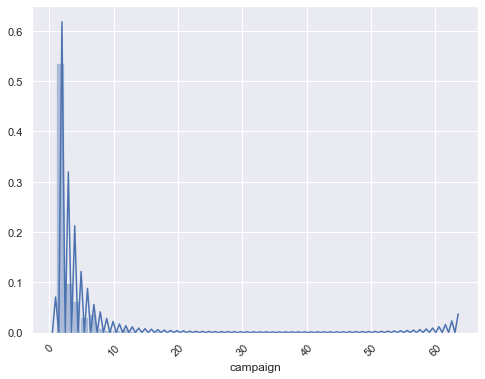

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


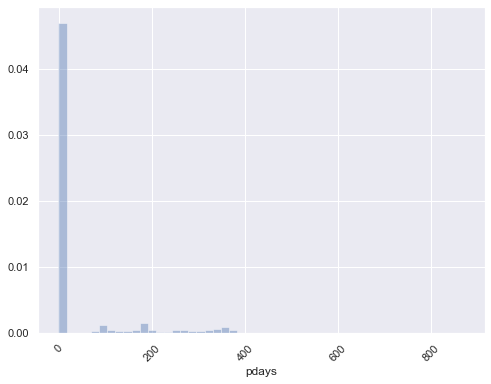

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


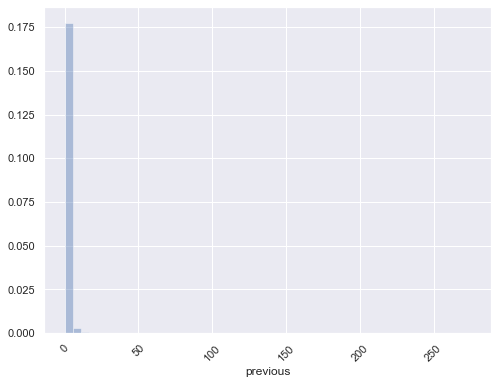

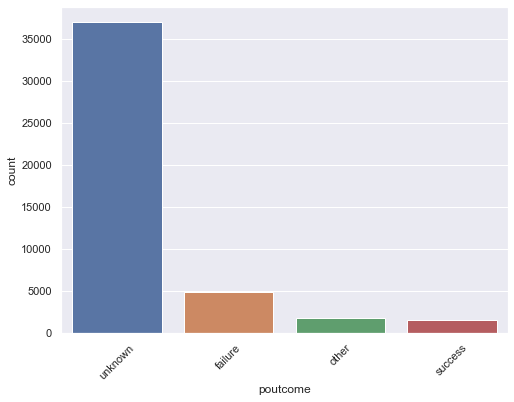

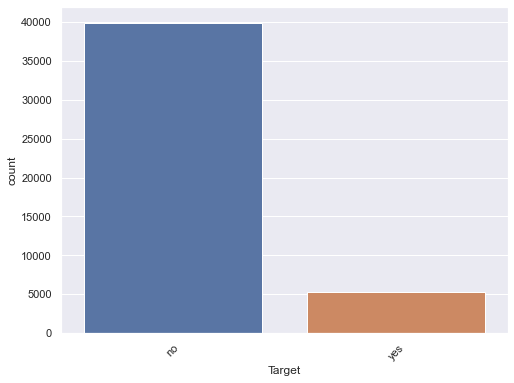

In [582]:
def geeplot(df):
    
    sns.set({'figure.figsize': (8,6)})

    for feature in df.columns: 
        if df[feature].dtype == 'object':
            (sns.countplot(df[feature]))
        else:
            (sns.distplot(df[feature]))
        plt.xticks(rotation=45)
        plt.show()
geeplot(bankdf)

### Univariate analysis : Identify outliers using IQR and verify the same using plots. Also mention the percentage of data points which are considered outliers. Should we treat them, why or why not? - 3 Marks

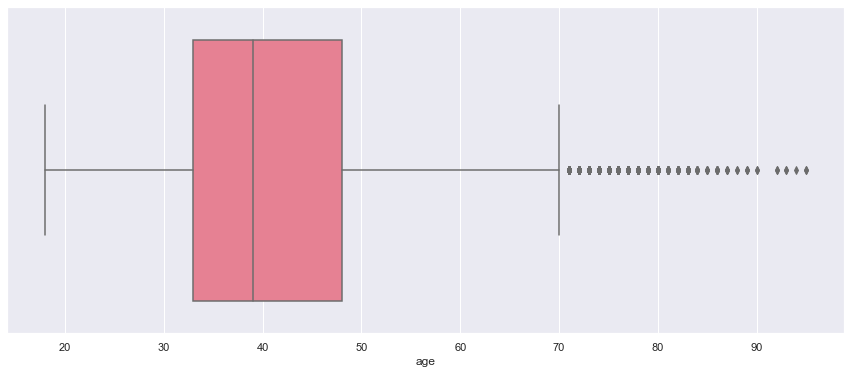

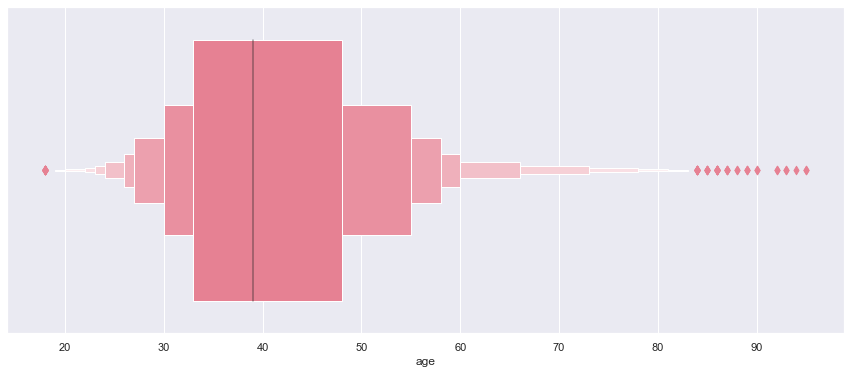

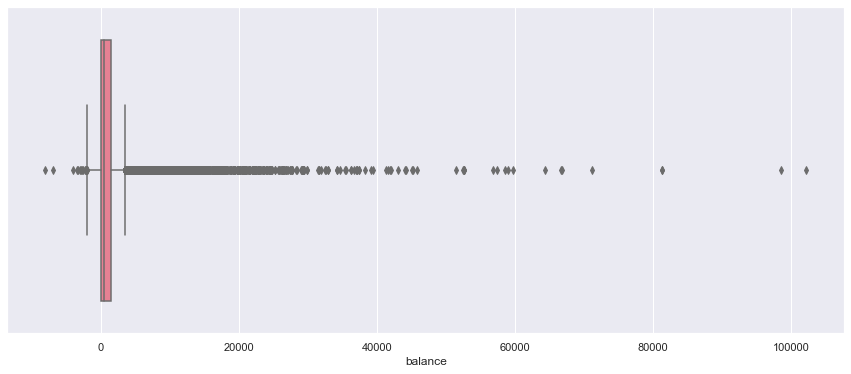

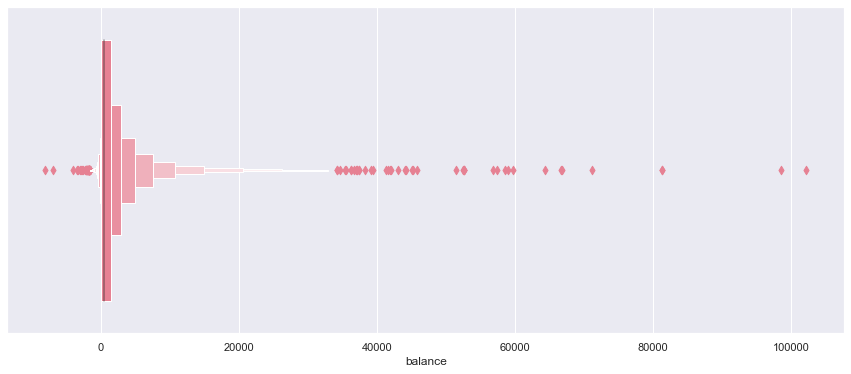

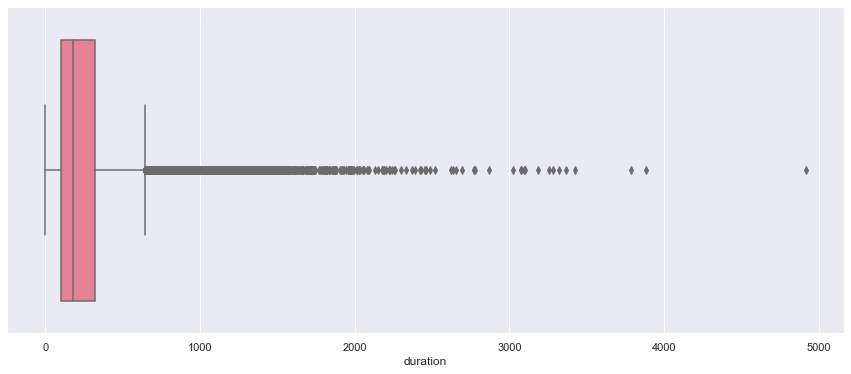

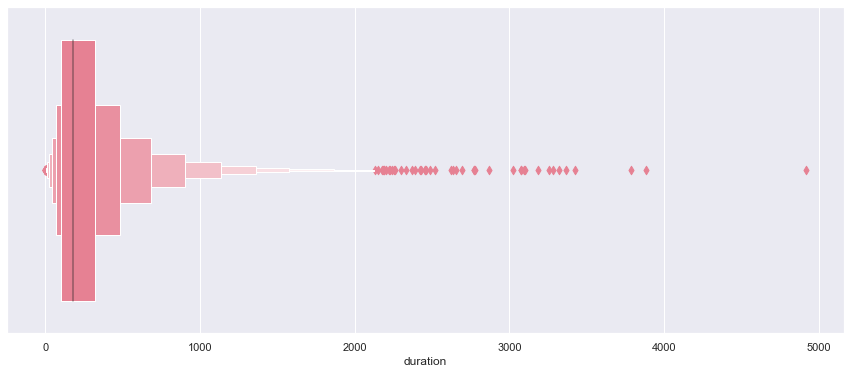

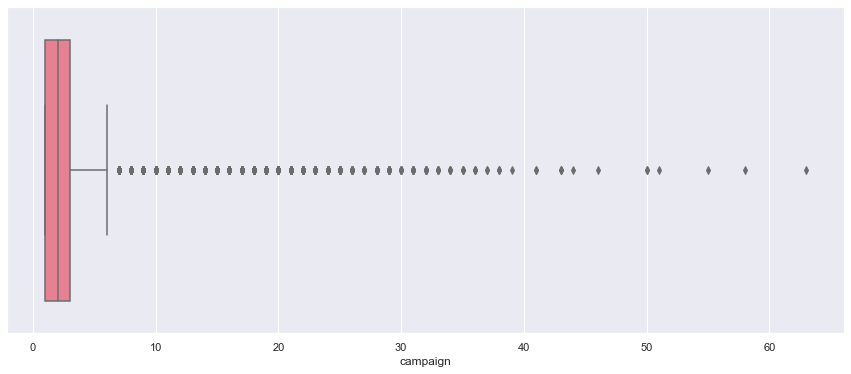

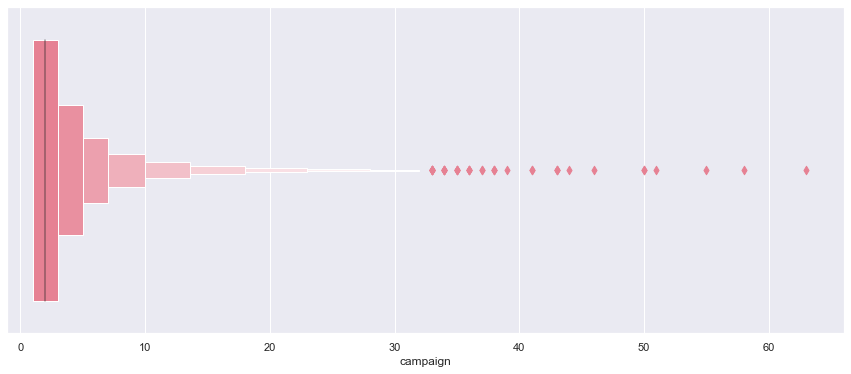

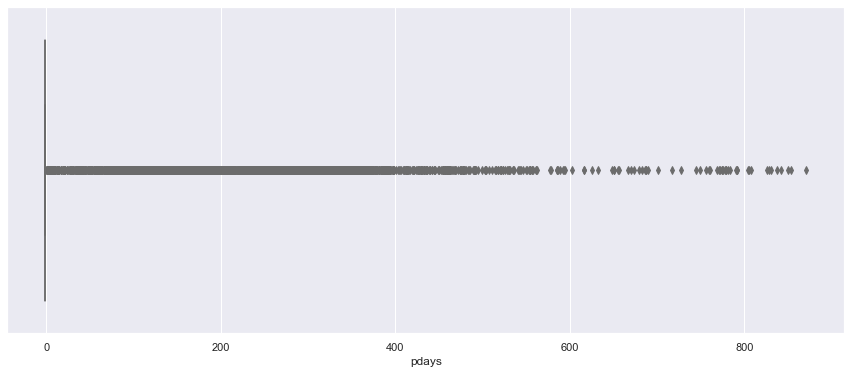

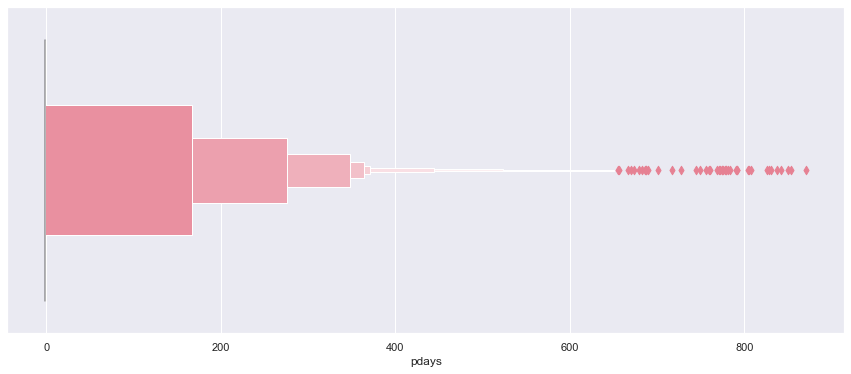

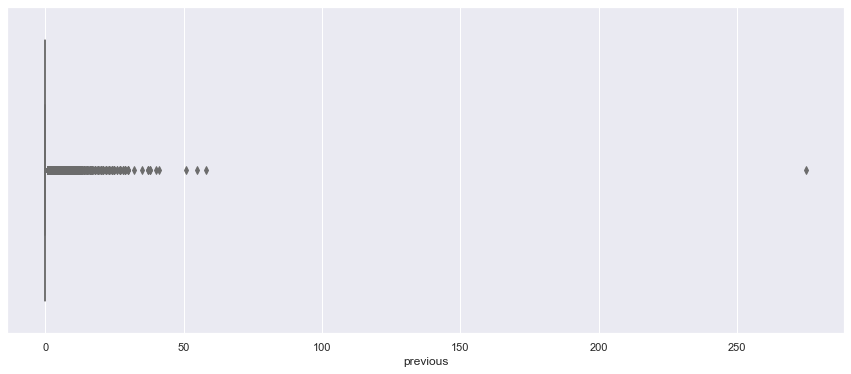

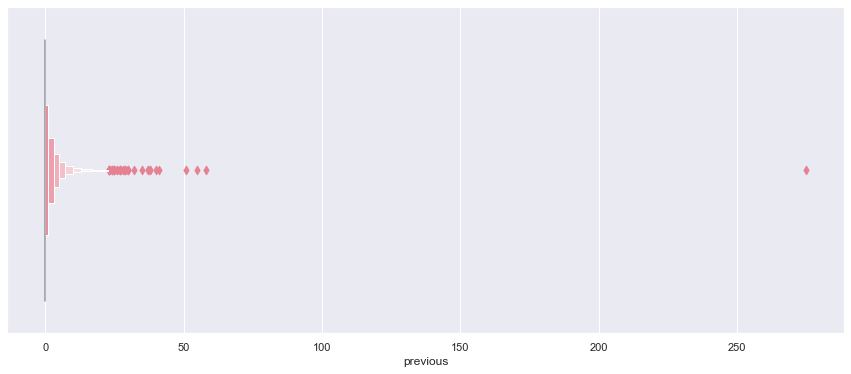

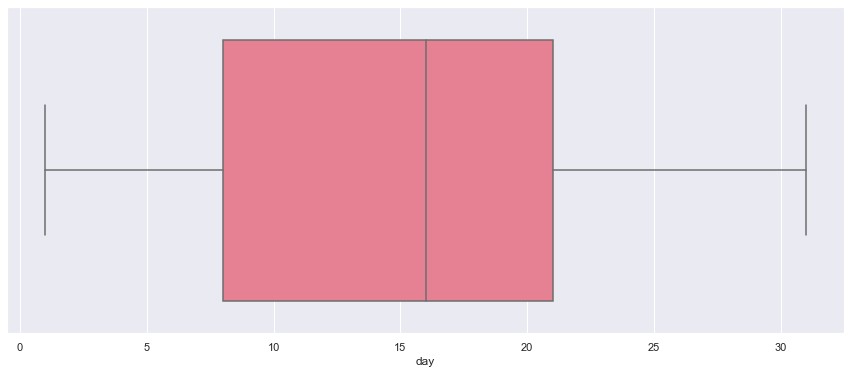

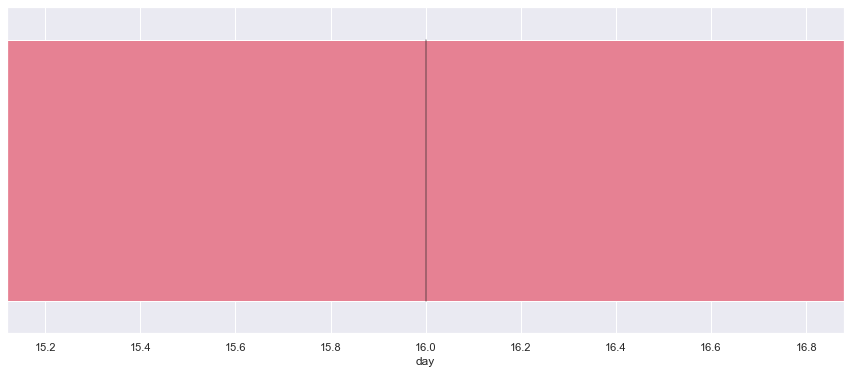

In [538]:
con_columns = ["age","balance","duration","campaign","pdays","previous","day"]
sns.set({'figure.figsize': (15,6)})
for i in con_columns:
    sns.boxplot(x=bankdf[i],palette="husl")
    plt.show()
    sns.boxenplot(x=bankdf[i],palette="husl")
    plt.show()

In [24]:
Q1 = bankdf.quantile(0.25)
Q3 = bankdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age          15.00
balance    1356.00
day          13.00
duration    216.00
campaign      2.00
pdays         0.00
previous      0.00
dtype: float64


In [64]:
def outlier_boundary(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return lower_boundary, upper_boundary

In [65]:
outlier_boundary(bankdf, "age", 1.5)

(10.5, 70.5)

In [66]:
outlier_boundary(bankdf, "balance", 1.5)

(-1962.0, 3462.0)

In [67]:
outlier_boundary(bankdf, "day", 1.5)

(-11.5, 40.5)

In [68]:
outlier_boundary(bankdf, "duration", 1.5)

(-221.0, 643.0)

In [69]:
outlier_boundary(bankdf, "campaign", 1.5)

(-2.0, 6.0)

In [70]:
outlier_boundary(bankdf, "pdays", 1.5)

(-1.0, -1.0)

In [71]:
outlier_boundary(bankdf, "previous", 1.5)

(0.0, 0.0)

In [85]:
con_columns = ["age","balance","duration","campaign","pdays","previous","day"]
for i in con_columns:

    lower_boundary, upper_boundary = outlier_boundary(bankdf, i, 1.5)

    outliers = np.where(bankdf[i] > upper_boundary, True,
                    np.where(bankdf[i] < lower_boundary, True, False))
    outliers_df = bankdf.loc[outliers, i]
    
    print (i, outliers_df.count())
    
    

age 487
balance 4729
duration 3235
campaign 3064
pdays 8257
previous 8257
day 0


### Univariate analysis : Percentage of data points which are considered outliers.

In [97]:
#pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pd.options.display.float_format = '{:,.2f}'.format
con_columns = ["age","balance","duration","campaign","pdays","previous","day"]
for i in con_columns:

    lower_boundary, upper_boundary = outlier_boundary(bankdf, i, 1.5)

    outliers = np.where(bankdf[i] > upper_boundary, True,
                    np.where(bankdf[i] < lower_boundary, True, False))
    outliers_df = bankdf.loc[outliers, i]
   
    print (i, outliers_df.count())
    
    print ('%.2f' % ((outliers_df.count()/45211)*100 ), "%")

age 487
1.08 %
balance 4729
10.46 %
duration 3235
7.16 %
campaign 3064
6.78 %
pdays 8257
18.26 %
previous 8257
18.26 %
day 0
0.00 %


### Outlier Summary: Should we treat them, why or why not?

Outlier Summary: Should we treat them, why or why not? :
    
age : 71 and above are marked as outlier, but realistically its possible. So no outlier treatment necessary.

balance : There are values at negative and this could be because of overdrafting. Max values are around 100K, 
so no treatment needed.

day : No outlier

duration : 10 mins to more than 1hr. 1 hr is acceptable. No outlier treatment done. 

campaign : number of contacts performed during this campaign and for this client. no treatment is necessary, even Iam getting calls from autoinsurance company twice a day, so its possible.

pdays : number of days that passed by after the client was last contacted from a previous campaign,
-1s were observed left untreated

previous : number of contacts performed before this campaign and for this client,no treatment is necessary as we need the no.of times contacted.



### Multivariate analysis  : Make a function to plot boxplots for all continuous variables VS ‘Target’ variable and countplots for all categorical variables VS ‘Target’ variable? 

#### Box plots for Continous variables

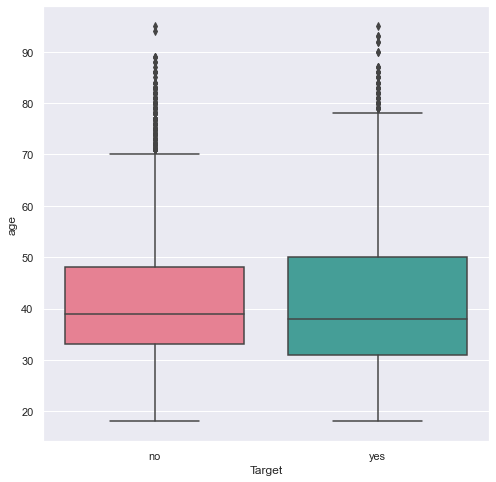

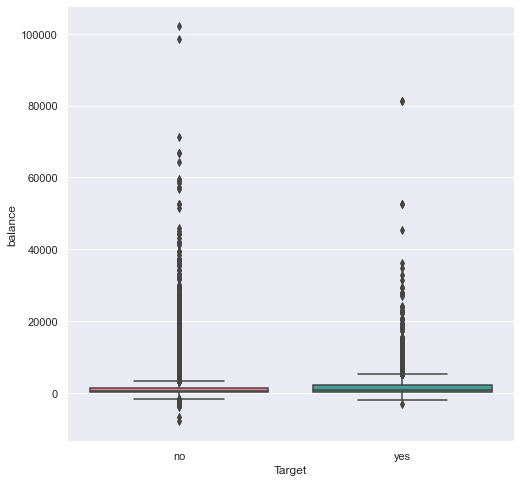

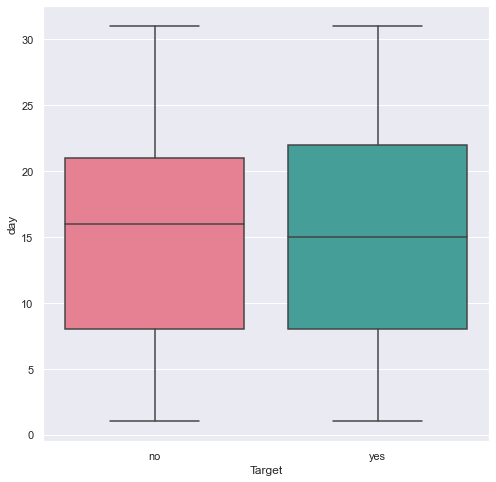

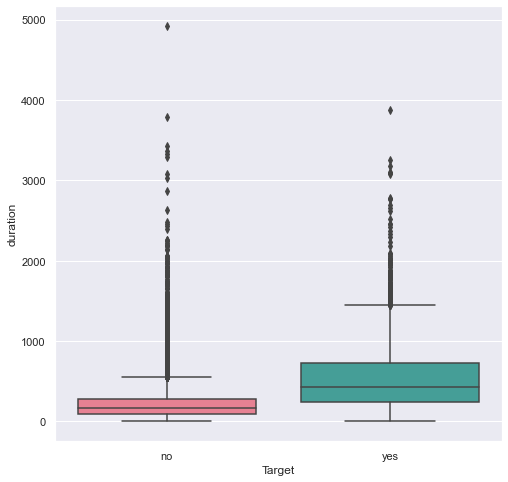

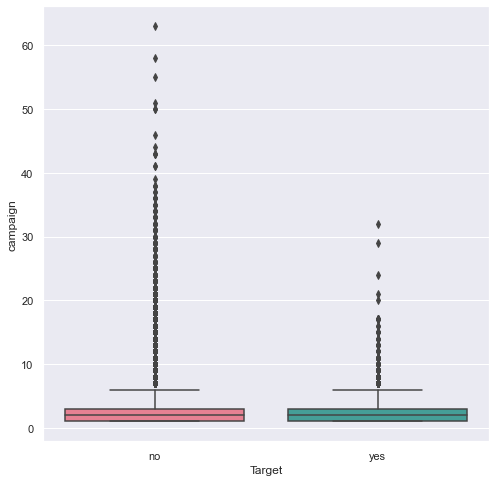

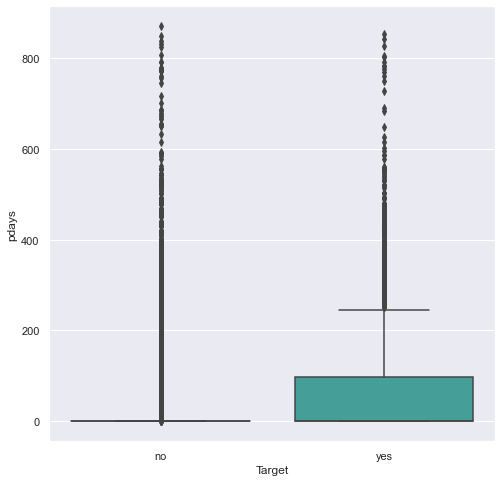

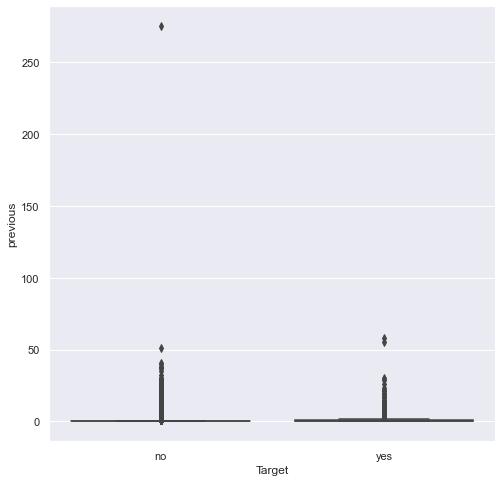

In [567]:
con_col = ["age","balance","day","duration","campaign","pdays","previous"]

def bplot(i):
    plt.figure(figsize=(8,8))
    sns.boxplot(x=bankdf['Target'], y=bankdf[i], palette="husl")
    plt.show()
    
for i in con_col:
    bplot(i)

#### Count plots for Catagorical variables

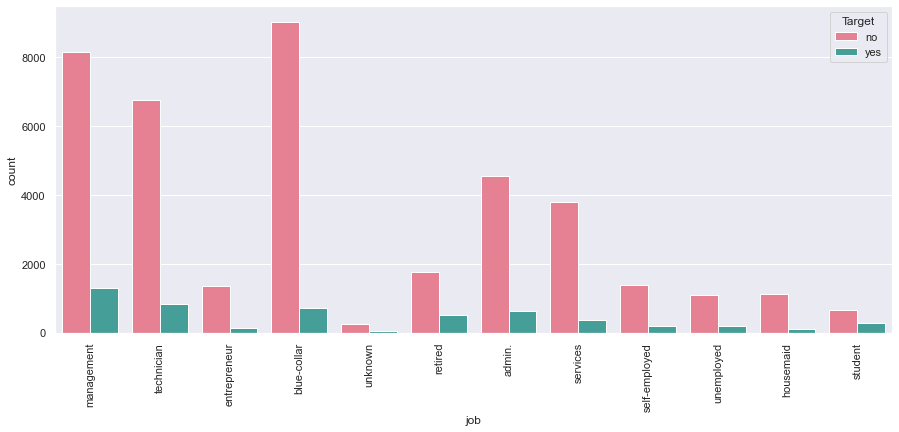

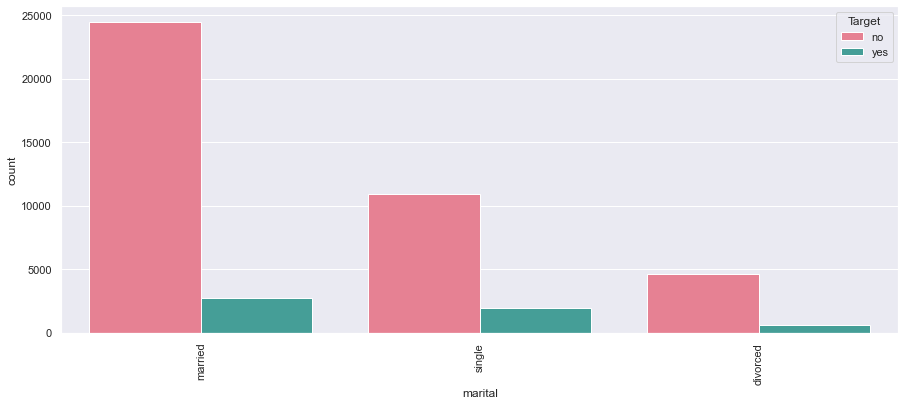

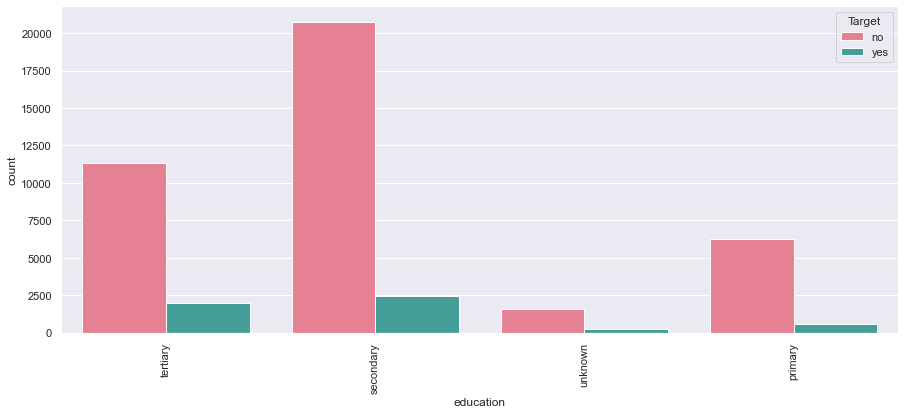

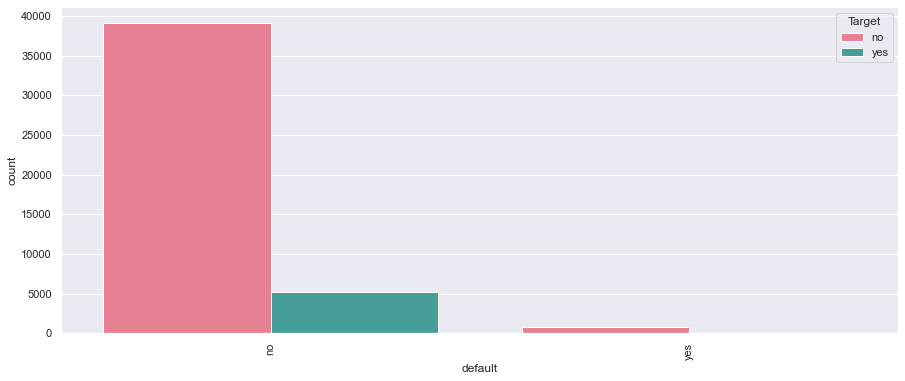

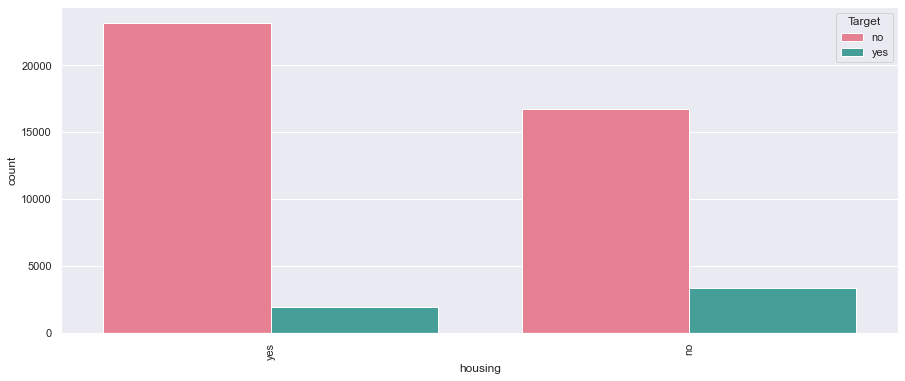

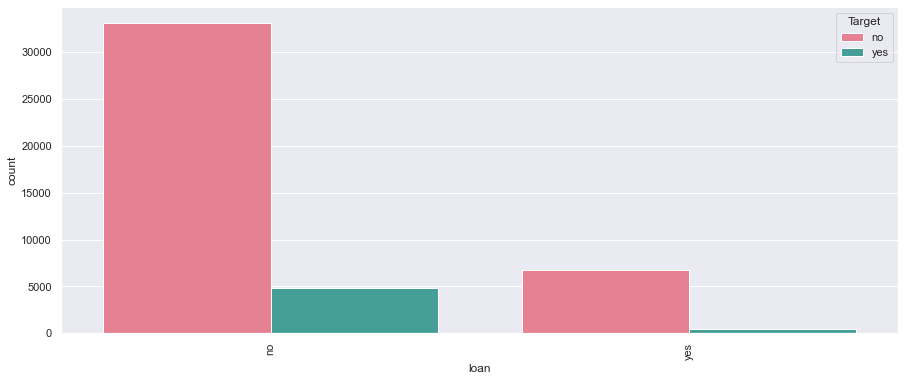

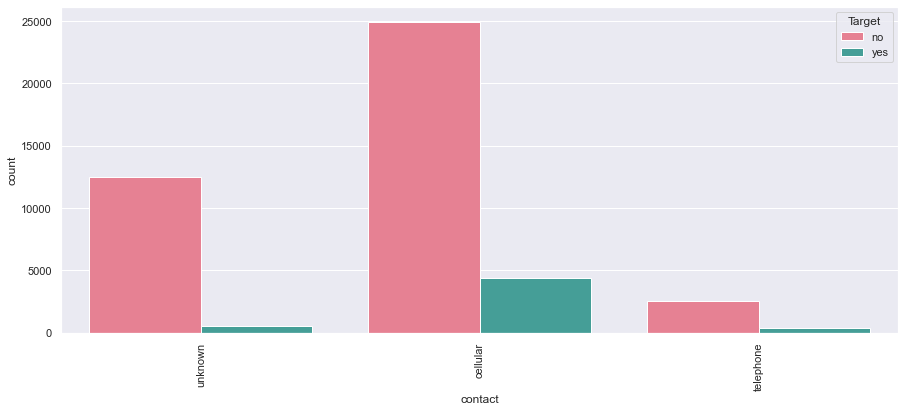

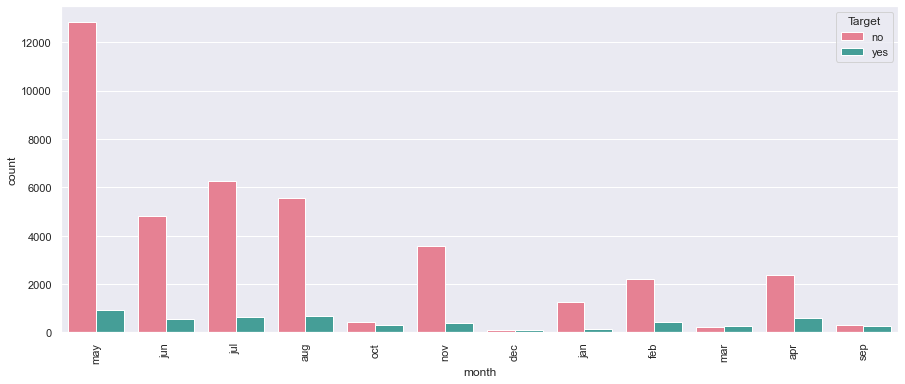

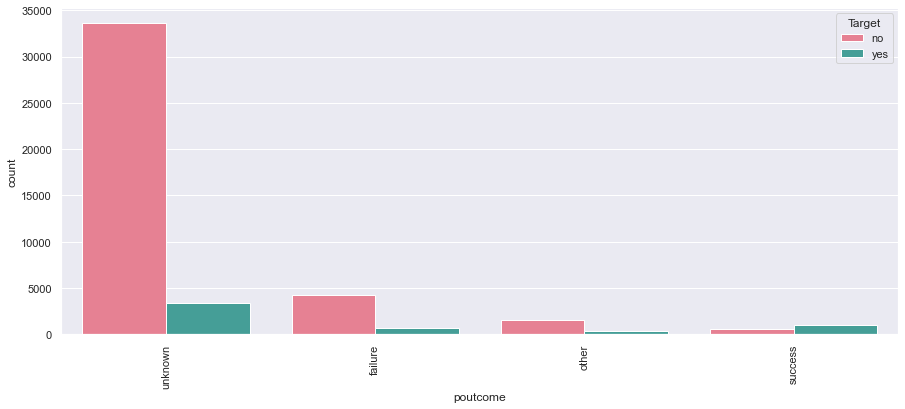

In [569]:
cat_col = ['job', 'marital', 'education', 'default','housing',
       'loan','contact','month','poutcome']

def cplot(i):
    #plt.figure(figsize=(8,8))
    sns.countplot(x=bankdf[i], hue=bankdf["Target"], palette="husl")
    plt.xticks(rotation=90)
    plt.show()
    
for i in cat_col:
    cplot(i)

#### Count in percent for easy comparision

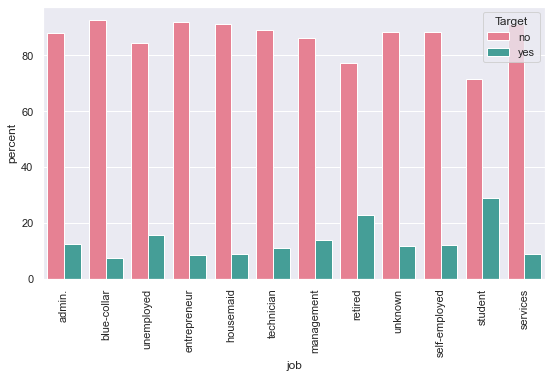

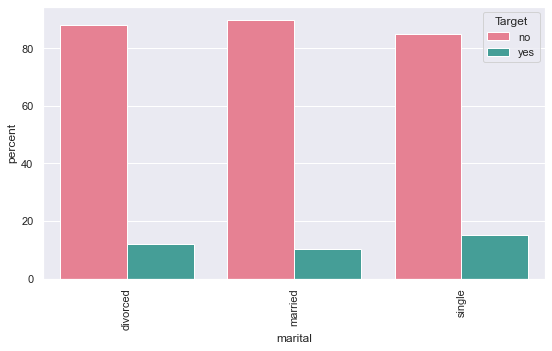

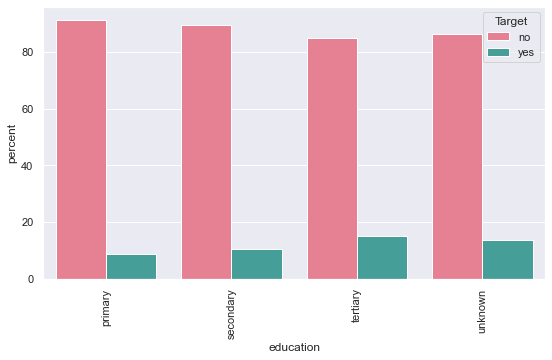

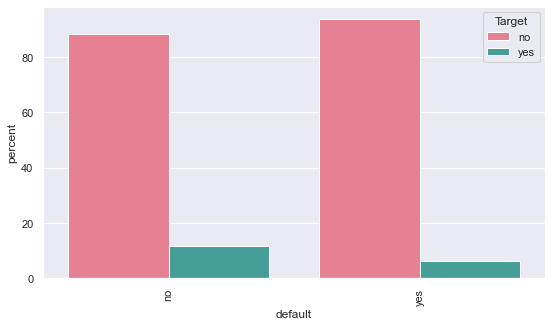

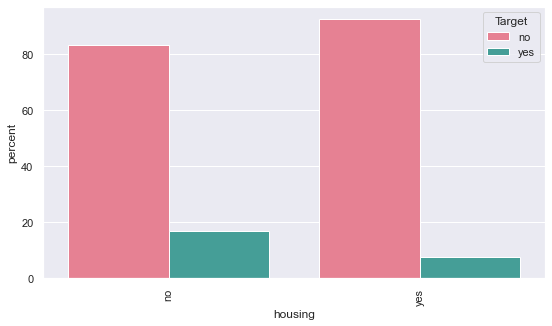

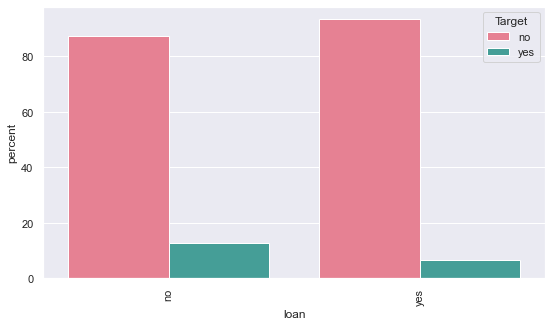

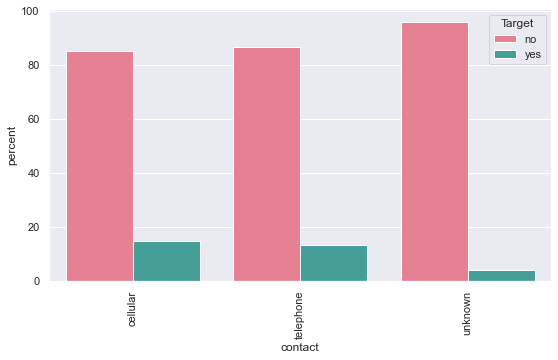

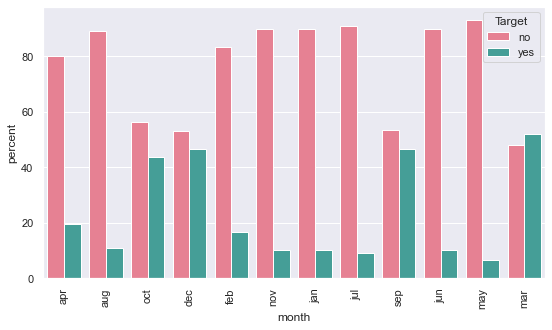

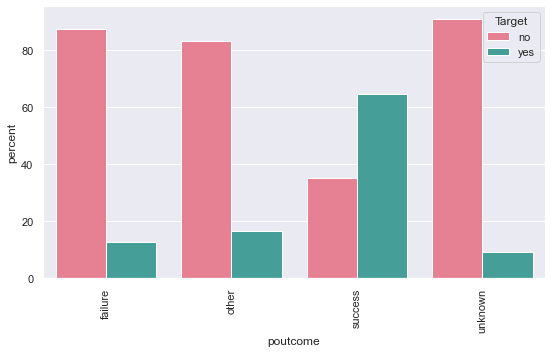

In [532]:
sns.set(rc={'figure.figsize':(9,5)}) #size of the plot
cat_col = ['job', 'marital', 'education', 'default','housing',
       'loan','contact','month','poutcome']
y = 'Target'

for i in cat_col:
    pl_counts = (bankdf.groupby(i)[y]
                 .value_counts(normalize=True)
                 .mul(100)
                 .rename('percent')
                 .reset_index()
                 .sort_values('Target'))
    p = sns.barplot(x=i, y='percent', hue='Target', data=pl_counts, palette="husl")
    _ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
    
    plt.show()

### Multivariate analysis : 
Bi-variate analysis between predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using pair plots, heatmaps, histograms or density curves

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


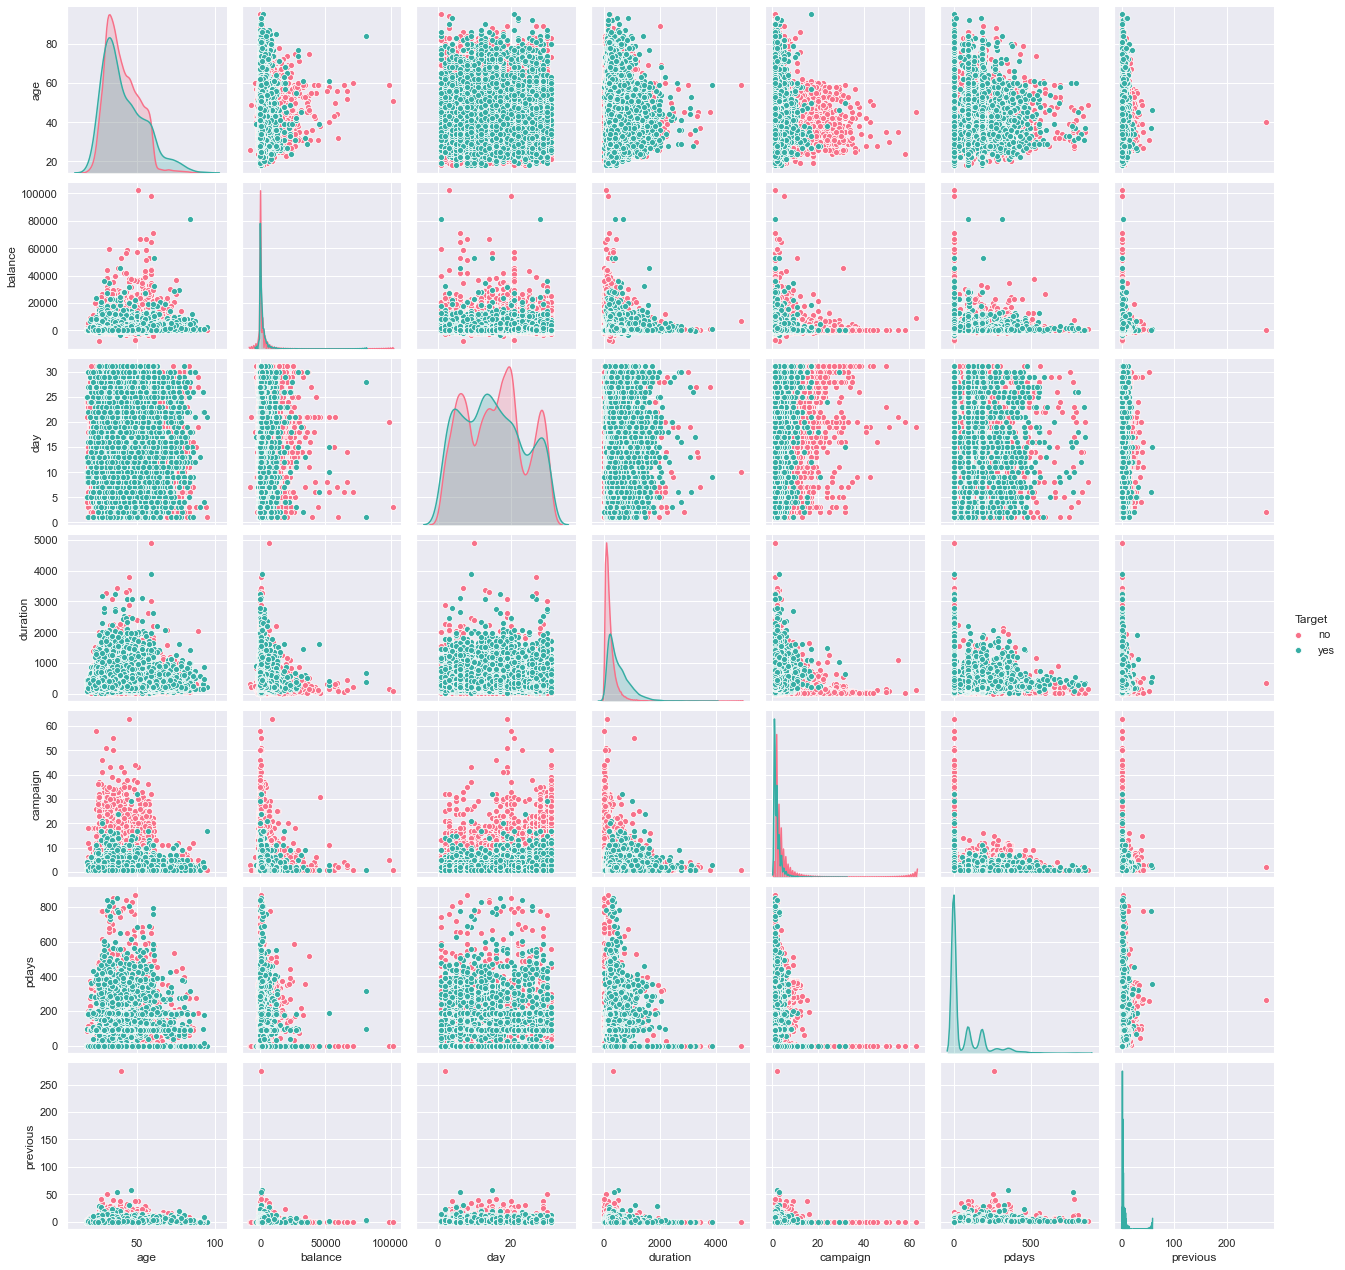

In [531]:
sns.pairplot(bankdf,hue="Target",palette="husl")

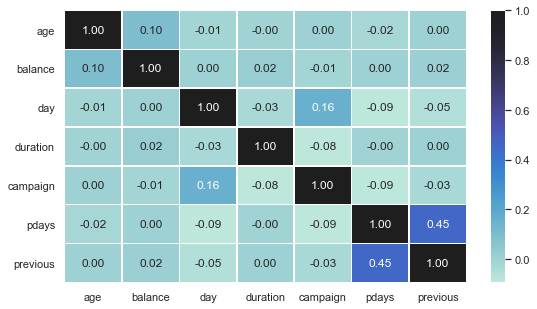

In [535]:
sns.heatmap(bankdf.corr(),annot=True, linewidths=.5, fmt= '.2f', center = 1)

In [193]:
bankdf['Target'].unique()

array(['no', 'yes'], dtype=object)

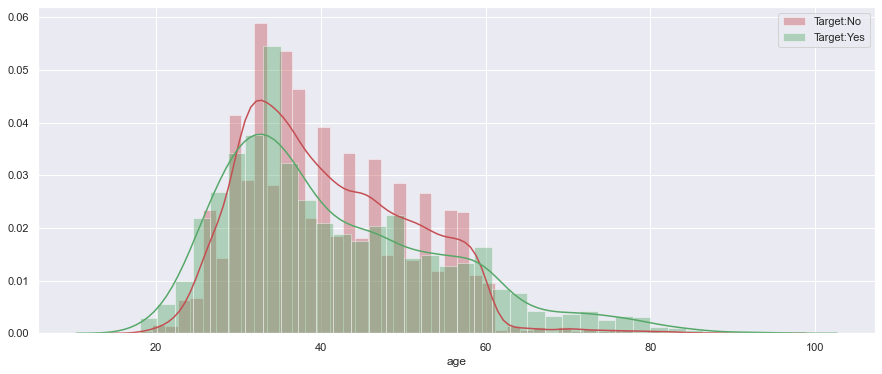

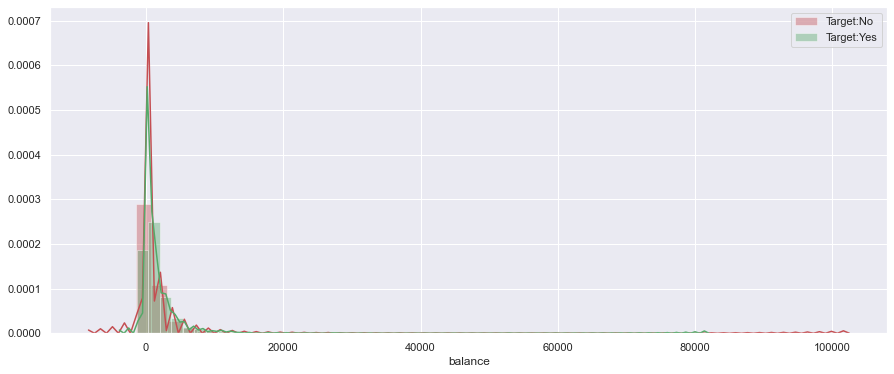

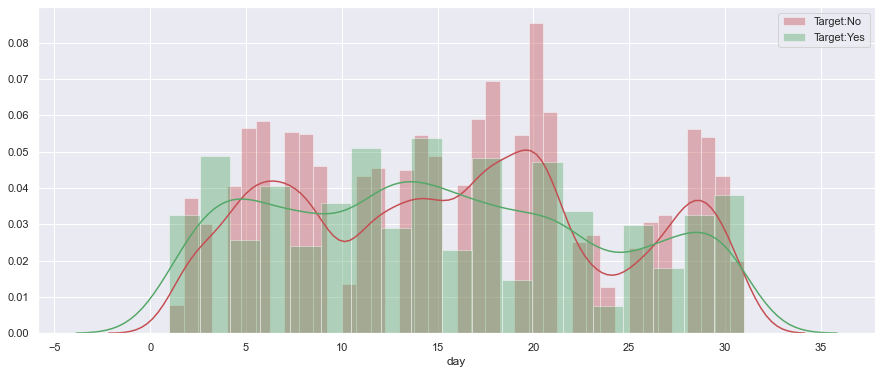

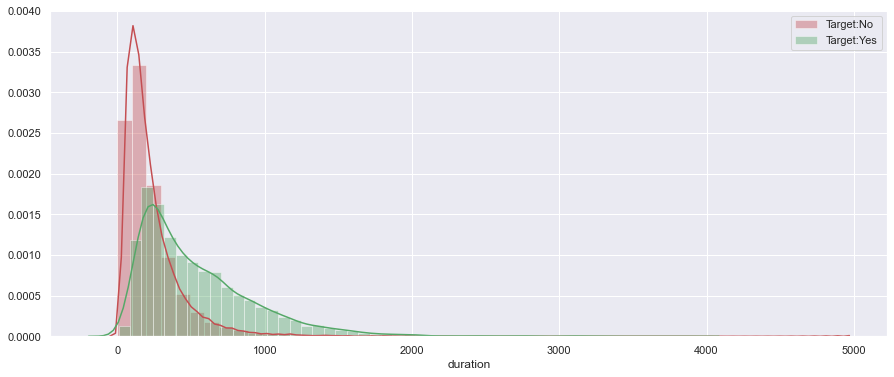

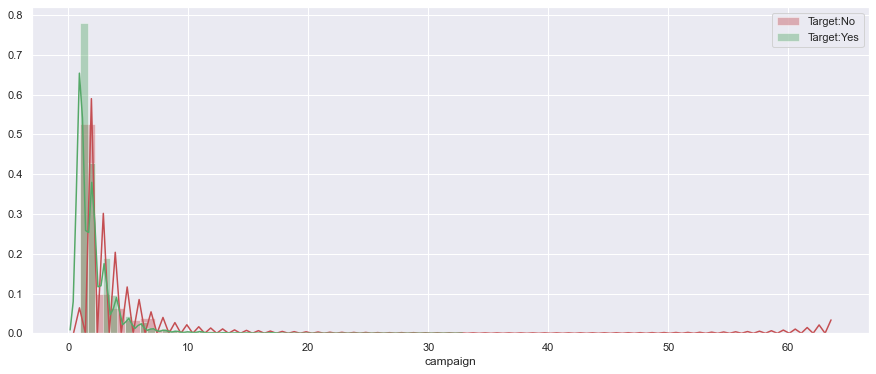

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


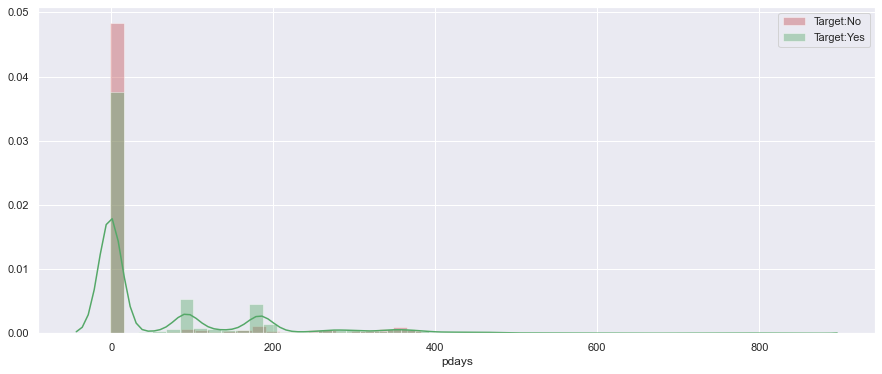

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


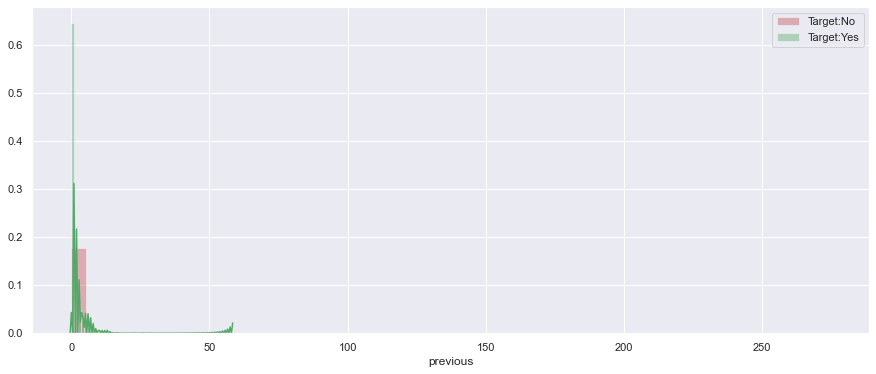

In [566]:
sns.set({'figure.figsize': (15,6)})
con_col = ["age","balance","day","duration","campaign","pdays","previous"]
for i in con_col:
    sns.distplot(bankdf[bankdf['Target']=='no'][i],color='r',label="Target:No")
    sns.distplot(bankdf[bankdf['Target']=='yes'][i],color='g',label="Target:Yes")
    plt.legend()
    plt.show()

### Bi-variate analysis Insights

In [ ]:
TD Acceptace rate is relatively higher with more bank balance
Successful acceptance of TD offer happened with atleast 4-5 mins. 
Customers with prevoius history of Term Deposit campaign acceptance, have relatively a higher chances of accepting another TDs in future
Majority of the customers who accepted within 5 campaigns  
Students and retired population have relatively higher acceptance of TD subscription


# Prepare the data for analytics

### Label encode or create dummy variables for categorical variables. Give reason for selecting either of them

In [447]:
bankdf2=bankdf.copy()

In [448]:
bankdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [449]:
for feature in bankdf2.columns: # Loop through all columns in the dataframe
    if bankdf2[feature].dtype == 'object': # Only apply for columns with categorical strings
        bankdf2[feature] = pd.Categorical(bankdf2[feature])# Replace strings with an integer
bankdf2.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [450]:
bankdf2.job.value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [451]:
bankdf2.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

In [227]:
bankdf2.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [228]:
bankdf2.default.value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [229]:
bankdf2.housing.value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

In [230]:
bankdf2.loan.value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

In [231]:
bankdf2.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [232]:
bankdf2.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [233]:
bankdf2.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [234]:
bankdf2.Target.value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [452]:
replaceStruct = {
                "education":     {"primary": 1, "secondary": 2 ,"tertiary": 3 ,"unknown":-1},
                "contact": {"telephone": 1, "cellular":2 , "unknown": -1},
                 "poutcome": {"failure":0 , "success": 1, "other": 2,"unknown": -1},
                 "default":     {"no": 0, "yes": 1 },
                 "housing":     {"no": 0, "yes": 1 }, 
                "loan":     {"no": 0, "yes": 1 }, 
                 "Target":     {"no": 0, "yes": 1 },                 
                                 }
oneHotCols=["job","marital","month"]

In [453]:
bankdf2=bankdf2.replace(replaceStruct)
bankdf2=pd.get_dummies(bankdf2, columns=oneHotCols)
bankdf2.head(10)

,age,education,default,balance,housing,loan,contact,day,duration,campaign,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,3,0,2143,1,0,-1,5,261,1,...,0,0,0,0,0,0,1,0,0,0
1,44,2,0,29,1,0,-1,5,151,1,...,0,0,0,0,0,0,1,0,0,0
2,33,2,0,2,1,1,-1,5,76,1,...,0,0,0,0,0,0,1,0,0,0
3,47,-1,0,1506,1,0,-1,5,92,1,...,0,0,0,0,0,0,1,0,0,0
4,33,-1,0,1,0,0,-1,5,198,1,...,0,0,0,0,0,0,1,0,0,0
5,35,3,0,231,1,0,-1,5,139,1,...,0,0,0,0,0,0,1,0,0,0
6,28,3,0,447,1,1,-1,5,217,1,...,0,0,0,0,0,0,1,0,0,0
7,42,3,1,2,1,0,-1,5,380,1,...,0,0,0,0,0,0,1,0,0,0
8,58,1,0,121,1,0,-1,5,50,1,...,0,0,0,0,0,0,1,0,0,0
9,43,2,0,593,1,0,-1,5,55,1,...,0,0,0,0,0,0,1,0,0,0


In [454]:
bankdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   contact            45211 non-null  int64
 7   day                45211 non-null  int64
 8   duration           45211 non-null  int64
 9   campaign           45211 non-null  int64
 10  pdays              45211 non-null  int64
 11  previous           45211 non-null  int64
 12  poutcome           45211 non-null  int64
 13  Target             45211 non-null  int64
 14  job_admin.         45211 non-null  uint8
 15  job_blue-collar    45211 non-null  uint8
 16  job_entrepreneur   45211 non-null  uint8
 17  job_housemai

### Reason for selecting Label encode or create dummy variables for categorical variables.

In [ ]:
Used Label encoding for the following features: Education, contact, poutcome, default, housing, personal loan and target
to preserve the hierarchy/ order/ relative levels. 

Whereas features such as  "job","marital","month" were treated with one hot-code encoding 
as I dont see some sort of order / hierarchy. Dont want to misinterpreted  by algorithms, therefore went with One Hot Code.  

### Create the training set and test set in a ratio of 70:30. Make sure and verify distribution of classes is the same in the full dataset and train test split data.

In [455]:
X = bankdf2.drop("Target", axis=1)
y= bankdf2.pop("Target")

In [456]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .30, stratify=y, random_state = 7)
print(X_train.shape, X_test.shape)

(31647, 40) (13564, 40)


#### Distribution of classes is the same (11.6%) in the full dataset and train test split data as we used stratify in the split 

In [565]:
bankdf["Target"].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [457]:
print(y_train.value_counts())

0    27945
1     3702
Name: Target, dtype: int64


In [458]:
print(y_test.value_counts())

0    11977
1     1587
Name: Target, dtype: int64


# Create the ensemble model

### Build the ensemble models (Bagging and Boosting) and Decision Tree model (at least 4 models in total). Note the model performance by using different metrics. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall.

In [267]:
from sklearn.metrics import mean_squared_error,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix

In [529]:
#Function for Train/Test Accuracy, Confusion matrix, Classification report

def crp(model, output):
    
    #Print scores for checking overfitting
    print("Train: %.2f" % model.score(X_train, y_train))
    print("Test: %.2f" % model.score(X_test, y_test))
    
    #Creating confusion matrix with legends
    z = pd.DataFrame()                                               # creating a new dataframe
    z['Actual'] = y_test.values                                      # Storing actual output of target variable
    z['Probaility that output is 0'] = model.predict_proba(X_test)[:,0]

    z['Probaility that output is 1'] = model.predict_proba(X_test)[:,1]
    z['Predicted'] = model.predict(X_test) 
    cf_matrix = confusion_matrix(z['Actual'], z['Predicted'])
    group_names = ['True_Neg','False_Pos','False_Neg','True_Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size":15})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    #Create dataframe with classification report and test train score for seeing overfitting
    cr = classification_report(y_test, y_pred, output_dict=True)
    t_cr = pd.DataFrame(cr).transpose()
    t_cr["Algorithm"] = output
    t_cr.reset_index(inplace=True)
    t_cr = t_cr.rename(columns = {'index':'metrics'})
    t_cr = t_cr.set_index('Algorithm')
    
    t_cr["Train"] =model.score(X_train, y_train)
    t_cr["Test"]=model.score(X_test, y_test)
    
    return(t_cr)

### DecisionTree (Model 1)

Train: 1.00
Test: 0.87


,metrics,precision,recall,f1-score,support,Train,Test
Algorithm,,,,,,,
dTree,0,0.93,0.93,0.93,"11,977.00",1.00,0.87
dTree,1,0.47,0.49,0.48,"1,587.00",1.00,0.87
dTree,accuracy,0.87,0.87,0.87,0.87,1.00,0.87
dTree,macro avg,0.70,0.71,0.70,"13,564.00",1.00,0.87
dTree,weighted avg,0.88,0.87,0.88,"13,564.00",1.00,0.87


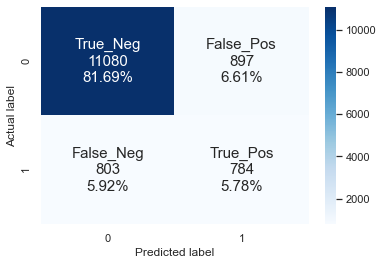

In [530]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=7)
dTree.fit(X_train, y_train)
y_pred = dTree.predict(X_test)

dTree_df = crp(dTree, "dTree")
dTree_df


### DecisionTree regularization-gini (Model 2)

Train: 0.90
Test: 0.90


,metrics,precision,recall,f1-score,support,Train,Test
Algorithm,,,,,,,
dTreeR,0,0.92,0.97,0.95,"11,977.00",0.90,0.90
dTreeR,1,0.65,0.37,0.48,"1,587.00",0.90,0.90
dTreeR,accuracy,0.90,0.90,0.90,0.90,0.90,0.90
dTreeR,macro avg,0.79,0.67,0.71,"13,564.00",0.90,0.90
dTreeR,weighted avg,0.89,0.90,0.89,"13,564.00",0.90,0.90


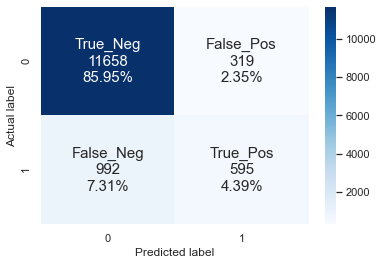

In [520]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=7)
dTreeR.fit(X_train, y_train)
y_pred = dTreeR.predict(X_test)

dTreeR_df = crp(dTreeR, "dTreeR")
dTreeR_df

### DecisionTree regularization-entropy (Model 3)

Train: 0.90
Test: 0.90


,metrics,precision,recall,f1-score,support,Train,Test
Algorithm,,,,,,,
dTreeRe,0,0.92,0.97,0.94,"11,977.00",0.90,0.90
dTreeRe,1,0.62,0.37,0.47,"1,587.00",0.90,0.90
dTreeRe,accuracy,0.90,0.90,0.90,0.90,0.90,0.90
dTreeRe,macro avg,0.77,0.67,0.71,"13,564.00",0.90,0.90
dTreeRe,weighted avg,0.89,0.90,0.89,"13,564.00",0.90,0.90


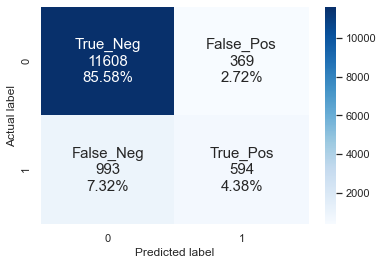

In [521]:
dTreeRe = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5, random_state=7)
dTreeRe.fit(X_train, y_train)
y_pred = dTreeRe.predict(X_test)

dTreeRe_df = crp(dTreeRe, "dTreeRe")
dTreeRe_df

### Randomforest (Model 4)

Train: 1.00
Test: 0.91


,metrics,precision,recall,f1-score,support,Train,Test
Algorithm,,,,,,,
rfcl,0,0.93,0.97,0.95,"11,977.00",1.00,0.91
rfcl,1,0.67,0.41,0.51,"1,587.00",1.00,0.91
rfcl,accuracy,0.91,0.91,0.91,0.91,1.00,0.91
rfcl,macro avg,0.80,0.69,0.73,"13,564.00",1.00,0.91
rfcl,weighted avg,0.90,0.91,0.90,"13,564.00",1.00,0.91


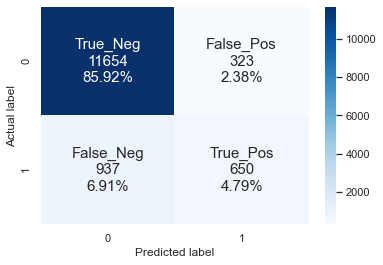

In [522]:

rfcl = RandomForestClassifier(n_estimators = 50,random_state=7)
rfcl = rfcl.fit(X_train, y_train)
y_pred = rfcl.predict(X_test)

rfcl_df = crp(rfcl, "rfcl")
rfcl_df


### Adaboost (Model 5)

Train: 0.90
Test: 0.90


,metrics,precision,recall,f1-score,support,Train,Test
Algorithm,,,,,,,
abcl,0,0.91,0.98,0.94,"11,977.00",0.90,0.90
abcl,1,0.64,0.26,0.36,"1,587.00",0.90,0.90
abcl,accuracy,0.90,0.90,0.90,0.90,0.90,0.90
abcl,macro avg,0.77,0.62,0.65,"13,564.00",0.90,0.90
abcl,weighted avg,0.88,0.90,0.88,"13,564.00",0.90,0.90


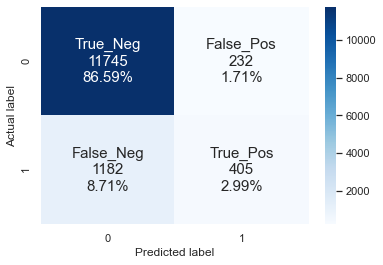

In [523]:

abcl = AdaBoostClassifier(n_estimators = 200, learning_rate=0.1, random_state=7)
abcl = abcl.fit(X_train, y_train)
y_pred = abcl.predict(X_test)

abcl_df = crp(abcl, "abcl")
abcl_df

### Bagging (Model 6)

Train: 0.99
Test: 0.91


,metrics,precision,recall,f1-score,support,Train,Test
Algorithm,,,,,,,
bgcl,0,0.93,0.96,0.95,"11,977.00",0.99,0.91
bgcl,1,0.63,0.46,0.53,"1,587.00",0.99,0.91
bgcl,accuracy,0.91,0.91,0.91,0.91,0.99,0.91
bgcl,macro avg,0.78,0.71,0.74,"13,564.00",0.99,0.91
bgcl,weighted avg,0.90,0.91,0.90,"13,564.00",0.99,0.91


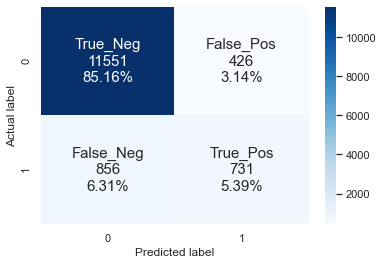

In [524]:

bgcl = BaggingClassifier(n_estimators=50, max_samples=.7, bootstrap=True, oob_score=True, random_state=7)
bgcl = bgcl.fit(X_train, y_train)
y_pred = bgcl.predict(X_test)

bgcl_df = crp(bgcl, "bgcl")
bgcl_df

### GradientBoosting (Model 7)

Train: 0.92
Test: 0.91


,metrics,precision,recall,f1-score,support,Train,Test
Algorithm,,,,,,,
gbcl,0,0.93,0.97,0.95,"11,977.00",0.92,0.91
gbcl,1,0.67,0.45,0.53,"1,587.00",0.92,0.91
gbcl,accuracy,0.91,0.91,0.91,0.91,0.92,0.91
gbcl,macro avg,0.80,0.71,0.74,"13,564.00",0.92,0.91
gbcl,weighted avg,0.90,0.91,0.90,"13,564.00",0.92,0.91


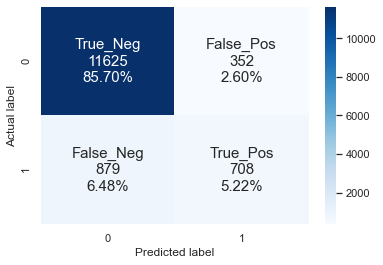

In [525]:

gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.2, random_state=7)
gbcl = gbcl.fit(X_train, y_train)
y_pred = gbcl.predict(X_test)

gbcl_df = crp(gbcl, "gbcl")
gbcl_df

### Also reflect the training and testing score of all the models. Build a dataframe with model names as row index and all the metrics calculated as columns

In [526]:
pdList = [dTree_df,dTreeR_df,dTreeRe_df,rfcl_df,abcl_df,bgcl_df,gbcl_df]  # List of your dataframes
summary_df = pd.concat(pdList)
summary_df

,metrics,precision,recall,f1-score,support,Train,Test
Algorithm,,,,,,,
dTree,0,0.93,0.93,0.93,"11,977.00",1.00,0.87
dTree,1,0.47,0.49,0.48,"1,587.00",1.00,0.87
dTree,accuracy,0.87,0.87,0.87,0.87,1.00,0.87
dTree,macro avg,0.70,0.71,0.70,"13,564.00",1.00,0.87
dTree,weighted avg,0.88,0.87,0.88,"13,564.00",1.00,0.87
dTreeR,0,0.92,0.97,0.95,"11,977.00",0.90,0.90
dTreeR,1,0.65,0.37,0.48,"1,587.00",0.90,0.90
dTreeR,accuracy,0.90,0.90,0.90,0.90,0.90,0.90
dTreeR,macro avg,0.79,0.67,0.71,"13,564.00",0.90,0.90


### Explain the confusion matrix related terms like recall, precision etc. Also, select the best metric to choose one of the models from above. Give your reason for the same.

True Positives (TP): The cases in which we predicted YES and it was actually YES.  
True Negatives (TN): The cases in which we predicted NO and it was actually NO.  
False Positives (FP): The cases in which we predicted YES and it was actually NO.  
False Negatives (FN): The cases in which we predicted NO and it was actually YES.  


Precision:   
    Precision = TP/(TP/FP)  
    It is the number of True Positive divided by the number of positive results predicted by the classifier.  
    To minimising False Positives, we would want Precision to be as close to 100%   

Recall/Sensitivity:   
    Recall = TP/(TP/FN)  
    It is the number of True Positives divided by the number of all relevant samples (all samples that should have been   identified as positive).   
    To minimising False Negatives, we would want Recall to be as close to 100%  
     

F1 Score is the Harmonic Mean between precision and recall.  
    It tells how precise the classifier is (how many instances it classifies correctly), as well as how robust it is (it does   not miss a significant number of instances).  
    The greater the F1 Score, the better is the performance of our model.  

Overall one can use F1-score it allow to compare models taking precision and recall in to consideration. 

#### However, Best metric for the current problem would be "Recall". 

Why because, we dont want to neglect potential customers who accept term deposit promotion, and infact want to maximize.
Therfore we should reduce the False negatives. To minimize False Negatives, we should want Recall to be as close to 100%

Based on this criteria, GradientBoostingClassifier model has higher recall score. Also no overfitting issues like other models .         


#### What do you mean by recall and what information does it provide here?

Recall (also called Sensitivity): Recall = TP/(TP/FN)  
    It is the number of True Positives divided by the number of all relevant samples (all samples that should have been identified as positive).   
    It helps when the cost of false negatives is high  
    To minimising False Negatives, we would want our Recall to be as close to 100%  
     
Here in this problem, recall is more important, as the cost of marketing is low,   
but the oppotunity cost of passing up on a customer is high. So we dont want to miss  
a potential customer by wrongly classifying them as Negative.  


#### Suggest some changes for the organization so that they can increase the number of customers who take term deposit.

Advice bank to collect best contact numbers of each customers to reach. Also encourage 
to update the numbers if changed as its crucial for the effectiveness of campaigns 

During campaigns, advice the team to engage the customers for atleast 4 to 5 mins. But contacting more than 5 times 
a customer would not change their mindset.     

Periodically send TD offers to current TD customers, with no loans and higher bank balance.  

#### How much influence does the previous campaign and mode of interaction have on financial performance.

1. Previous sucessful campaign customers have a higher chance of accepting TDs future campaigns.
2. Telephone and Mobile both seems to be effective for reaching the customers 

#### Which features should be more/less focused by the bank to get better results and why?

In [589]:
feature_df = pd.DataFrame(pd.DataFrame(gbcl.feature_importances_, columns = ["Imp"], index = X_train.columns))#Print the feature importance of the decision model
feature_df = feature_df.sort_values(by=["Imp"],ascending=False)
feature_df.head(10)

,Imp
duration,0.44
poutcome,0.14
pdays,0.05
day,0.05
age,0.05
contact,0.04
housing,0.04
month_mar,0.03
month_oct,0.03
month_jun,0.02


####  Learnings about banking industries from this data?

Banking industries can leaverage AI to be more productive in indentifying the right targets based 
on the data to maximize ROI out of Marketing campaigns and to improve Year-over-year growth. 

### Comments in the solution notebook regarding the steps you take and also provide insights drawn from the plots

Did exploratory analysis on the fetures provided at customer level to understand the association with target variables. 
Used Label encoding (for some categorical features)to preserve the relative significance of levels, used contionous variables 
as it is without removing any outliers Also did one hot-code encoding for several categorical variables which dont have 
any hierachical significance.   

For creating the model, split the data by 70:30 ratio, preserving the proportion of 'Yes/No' Targets. And ran multiple models. 
Hypertuned the models to reduce overfitting and increase the recall score.   

Finally created a dataframe showing the list of models created and their outputs for a easier comparison  

Insights: 
        Last contact duration is critical. Atleast 5 mins conversation is required to increase the probability of success.    
        Previous campaign outcome matters. Retargeting previous Term deposit customers is beneficial in improving the  
        chance   for acceptance.   
        Wait until 90 days to contact the client again after last contact.  
        Customers without House loan / Personal loan and with higher balance more likely acceptance TD offer.    
        Majority of the customers who accepted within 5 campaigns.    
        Students and retired population have relatively higher acceptance of TD subscription.  
        
      

-- Gradient boosting algorithm yields 45% recall for target lab "Yes" without overfitting  